<a href="https://colab.research.google.com/github/moroq2/AI-2024-S2/blob/main/2024_s2_mobilenetv2_r4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#画像データに対して、10種類のラベルの1つを割り当てるモデルを作成していただきます

画像認識とは、画像および動画から文字や顔などのオブジェクトや特徴を認識し検出するパターン認識技術の一分野です。特に画像に対してラベルを割り当てる画像分類は画像認識の領域においてポピュラーな研究分野となっていて、最近は深層学習が圧倒的な精度を達成しています。今回は犬や猫などの動物や車などの無機物が写った画像に対して10種類のラベルから一つ割り当てる問題に挑戦していただきます。

本コンペを活用して、データ解析・モデル構築を体験してください。

データ概要

課題種別：分類
データ種別：画像
学習データサンプル数：5,000
画像の大きさ：96×96

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Num GPUs Available:  1
Found 4000 validated image filenames belonging to 10 classes.
Found 1000 validated image filenames belonging to 10 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 87s 5s/step - accuracy: 0.2663 - loss: 2.5126 - val_accuracy: 0.7437 - val_loss: 0.9006
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.6573 - loss: 0.9815 - val_accuracy: 0.7513 - val_loss: 0.7482
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.7364 - loss: 0.7675 - val_accuracy: 0.7513 - val_loss: 0.7323
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.7813 - loss: 0.6438 - val_accuracy: 0.7800 - val_loss: 0.6632
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.7959 - loss: 0.5968 - val_accuracy: 0.8037 - val_loss: 0.6165
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8204 - loss: 0.5300 - val_accuracy: 0.7975 - val_loss: 0.5755
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8172 - loss: 0.5174 - val_accuracy: 0.8050 - val_loss: 0.5860
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.8361 - loss: 0.4850 - val_accuracy: 0.7812 - val_loss:

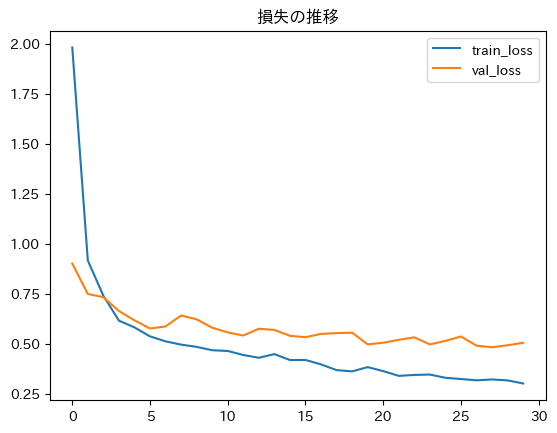

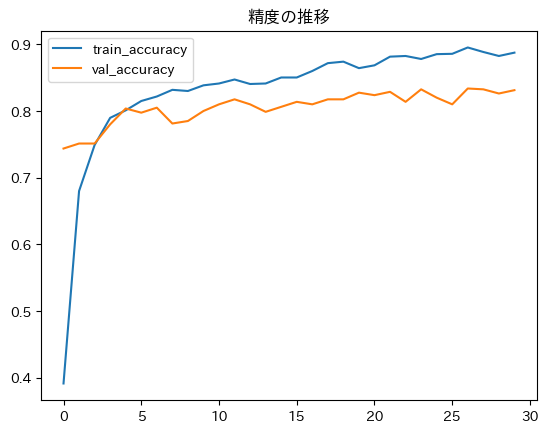

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 68s 5s/step - accuracy: 0.8228 - loss: 0.5256 - val_accuracy: 0.7925 - val_loss: 0.6841
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8728 - loss: 0.3805 - val_accuracy: 0.8012 - val_loss: 0.6699
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.8835 - loss: 0.3047 - val_accuracy: 0.8075 - val_loss: 0.6414
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9040 - loss: 0.2819 - val_accuracy: 0.8037 - val_loss: 0.6784
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 5s/step - accuracy: 0.9103 - loss: 0.2706 - val_accuracy: 0.7750 - val_loss: 0.8017
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 51s 5s/step - accuracy: 0.9173 - loss: 0.2321 - val_accuracy: 0.7763 - val_loss: 0.8748


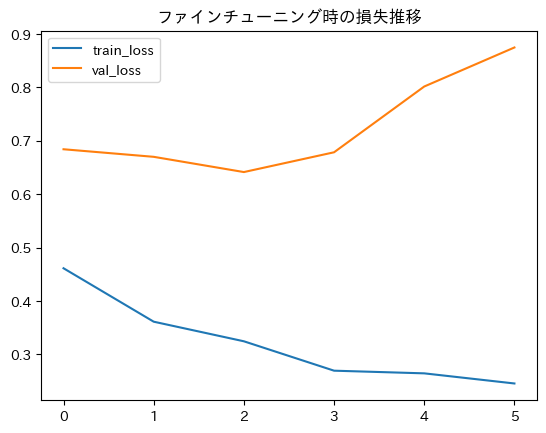

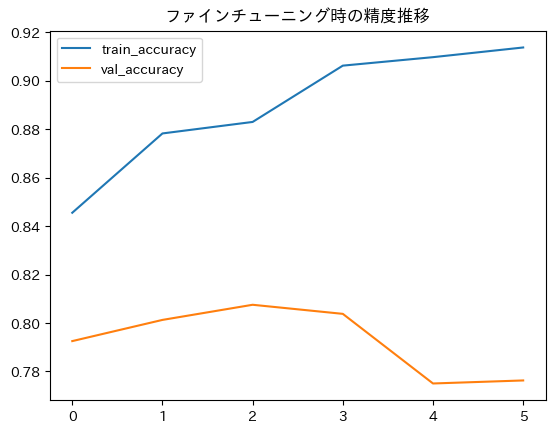

Found 8000 validated image filenames.
20/20 ━━━━━━━━━━━━━━━━━━━━ 21s 844ms/step
提出用ファイル /content/drive/MyDrive/Colab Notebooks/AI_2024_S2/submission_mobilenetv2_0318_r0.tsv を作成しました。


In [ ]:
# 以下のコードは Google Colab 上で GPU を使用する想定で作成されています。
# ImageDataGenerator に brightness_range を追加し、輝度調整のデータ拡張を含めました。

# 1. Google Drive をマウント
from google.colab import drive
drive.mount('/content/drive')

# ★★★ 日本語表示のためのライブラリをインストール＆インポート ★★★
!pip install japanize_matplotlib
import japanize_matplotlib

# 2. ファイルパスの設定
base_dir = "/content/drive/MyDrive/Colab Notebooks/AI_2024_S2"

# 3. GPUが利用可能か確認
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# 4. 必要なライブラリのインポート
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# データ解凍（既に存在する場合はスキップ）
if not os.path.exists("train_images"):
    os.system(f"unzip -q '{base_dir}/train_images.zip'")
    os.system(f"unzip -q '{base_dir}/test_images.zip'")
    !cp "{base_dir}/label_master.tsv" .
    !cp "{base_dir}/sample_submit.tsv" .
    !cp "{base_dir}/train_master.tsv" .

# 5. 学習用マスタファイルとラベルファイルの読み込み
train_master = pd.read_csv('train_master.tsv', sep='\t')
label_master = pd.read_csv('label_master.tsv', sep='\t')
train_master['label_id'] = train_master['label_id'].astype(str)

# 6. 学習済みモデル用の前処理（MobileNetV2 用）
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# 7. データ前処理とデータ拡張
#    ※ MobileNetV2 の統計に合わせた preprocessing_function を利用
#    輝度の最適化処理（brightness_range）を追加

datagen_train = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    validation_split=0.2,  # 学習データの20%を検証用に分割
    brightness_range=[0.8, 1.2],  # 輝度の最適化処理を追加
    preprocessing_function=preprocess_input
)

datagen_val = ImageDataGenerator(
    validation_split=0.2,
    brightness_range=[0.8, 1.2],  # 輝度の最適化処理を追加
    preprocessing_function=preprocess_input
)

# 8. トレーニング用・バリデーション用のジェネレータ
train_generator = datagen_train.flow_from_dataframe(
    dataframe=train_master,
    directory="train_images",
    x_col='file_name',
    y_col='label_id',
    target_size=(224, 224),  # 224x224にリサイズ
    batch_size=400,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=42
)

val_generator = datagen_val.flow_from_dataframe(
    dataframe=train_master,
    directory="train_images",
    x_col='file_name',
    y_col='label_id',
    target_size=(224, 224),
    batch_size=400,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=42
)

# 9. MobileNetV2 を使った転移学習モデルの構築
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model

def build_transfer_model(input_shape=(224,224,3), num_classes=10):
    # 事前学習済みの MobileNetV2 を読み込み（最終の全結合層なし）
    base_model = MobileNetV2(
        input_shape=input_shape,
        include_top=False,
        weights='imagenet'
    )

    # ベースモデルを一旦固定
    for layer in base_model.layers:
        layer.trainable = False

    # 独自の出力層を追加
    x = base_model.output
    x = GlobalAveragePooling2D()(x)      # Flatten の代わり
    x = Dense(512, activation='relu')(x) # 全結合層
    x = Dropout(0.5)(x)
    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=outputs)

    # コンパイル
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# モデルを構築
model = build_transfer_model(input_shape=(224,224,3), num_classes=10)

# 10. モデルの学習（ベースモデルは固定したまま）
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ModelCheckpoint('best_model_mobilenetv2.keras', monitor='val_loss', save_best_only=True)
]

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=30,  # とりあえず20エポック程度
    callbacks=callbacks
)

# 学習履歴のグラフを作成（分割して表示）
# -- Loss
plt.figure()
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('損失の推移')
plt.legend()
plt.show()

# -- Accuracy
plt.figure()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('精度の推移')
plt.legend()
plt.show()

# ======== ファインチューニングステップを追加 ========
# 最初の学習が終わったら、ベースモデルの「後ろ20層」だけを解凍して再学習する例

# 10-b. 後ろから20層を学習対象にする
for layer in model.layers[-20:]:
    layer.trainable = True

# 再コンパイル（学習率はさらに小さくする）
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 新たなコールバックを定義するか、使い回してもOK（ここでは別名にしておく）
fine_tune_callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint('best_model_mobilenetv2_finetuned.keras', monitor='val_loss', save_best_only=True)
]

history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    epochs=20,  # ファインチューニングを短めに追加
    callbacks=fine_tune_callbacks
)

# ファインチューニングの学習推移を可視化（分割して表示）
plt.figure()
plt.plot(history_finetune.history['loss'], label='train_loss')
plt.plot(history_finetune.history['val_loss'], label='val_loss')
plt.title('ファインチューニング時の損失推移')
plt.legend()
plt.show()

plt.figure()
plt.plot(history_finetune.history['accuracy'], label='train_accuracy')
plt.plot(history_finetune.history['val_accuracy'], label='val_accuracy')
plt.title('ファインチューニング時の精度推移')
plt.legend()
plt.show()

# 11. テストデータでの推論と提出ファイルの作成
test_filenames = os.listdir("test_images")
test_df = pd.DataFrame({'file_name': test_filenames})

# テストでも同じ前処理を適用 (データ拡張なし)
test_datagen = ImageDataGenerator(
    brightness_range=[0.8, 1.2],  # 輝度の最適化処理を追加
    preprocessing_function=preprocess_input
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory="test_images",
    x_col='file_name',
    y_col=None,
    target_size=(224,224),
    batch_size=400,
    class_mode=None,
    shuffle=False
)

# 推論
predictions = model.predict(test_generator, steps=len(test_generator), verbose=1)
predicted_classes = np.argmax(predictions, axis=1)

# 提出用ファイルの作成
submission = pd.DataFrame({'file_name': test_filenames, 'label_id': predicted_classes})

# ------ ここでファイル名から数値を抽出してソート ------
# 例： 'test_10.jpg' -> 10 を抜き出し、整数としてソート
submission['file_num'] = submission['file_name'].str.extract(r'(\d+)').astype(int)
submission = submission.sort_values(by='file_num').drop(columns='file_num')

# ソート後の提出用ファイルを保存
output_filename = f'{base_dir}/submission_mobilenetv2_0318_r0.tsv'
submission.to_csv(output_filename, sep='\t', index=False, header=False)
print(f"提出用ファイル {output_filename} を作成しました。")